<h1>Assignment 3</h1>
<h3>Juan Camilo Castro Pinto</h3>
<h3>Andres Felipe Cantor</h3>
<br/>

### 1.
#### (a)

let $ x = \{x_{1}, . . . , x_{n} \} $ be a subset of a input data set X. Consider a kernel function $$\it{k} : X \times X   \rightarrow \Re $$ $$ X \rightarrow \phi(X)$$

Then the average distance to the enter of mass of the image of set x in the feature space is: $$\frac{1}{n}\sum_{i=1}^{n}\lVert\phi(x_{i})-\phi_{S}(x)\rVert$$

With $$\phi_{S}(x) = \frac{1}{n}\sum_{i=1}^{n}\phi(x_{i})$$

So taking the definition of $\lVert x\rVert$ as $\sqrt{\langle x,x \rangle}$ (not squared). Then we can rewrite $\lVert\phi(x_{i})-\phi_{S}(x)\rVert$ as 

$$\sqrt{\langle \phi(x_{i})-\phi_{S}(x),\phi(x_{i})-\phi_{S}(x) \rangle}$$ By distributive property of dot product

$$\sqrt{\langle \phi(x_{i}),\phi(x_{i}) \rangle - \langle \phi(x_{i}),\phi_S(x) \rangle - \langle \phi_{S}(x),\phi(x_{i})\rangle + \langle \phi(x),\phi_S(x) \rangle} $$ 

By commutative property

$$\sqrt{\langle \phi(x_{i}),\phi(x_{i}) \rangle - 2\langle \phi(x_{i}),\phi_S(x) \rangle + \langle \phi_S(x),\phi_S(x) \rangle} $$ 

Replacing the definition of $\phi_S(x)$ we have

$$\sqrt{\langle \phi(x_{i}),\phi(x_{i}) \rangle - 2\langle \phi(x_{i}),\frac{1}{n}\sum_{j=1}^{n}\phi(x_{j}) \rangle + \langle \frac{1}{n}\sum_{j=1}^{n}\phi(x_{j}),\frac{1}{n}\sum_{j=1}^{n}\phi(x_{j}) \rangle}$$ 

Taking out the scalars, we have

$$\sqrt{\langle \phi(x_{i}),\phi(x_{i}) \rangle - \frac{2}{n}\langle \phi(x_{i}),\sum_{j=1}^{n}\phi(x_{j}) \rangle + \frac{1}{n^2}\langle \sum_{j=1}^{n}\phi(x_{j}),\sum_{k=1}^{n}\phi(x_{k}) \rangle}$$ 

By the distributive property of dot product

$$\sqrt{\langle \phi(x_{i}),\phi(x_{i}) \rangle - \frac{2}{n} \sum_{j=1}^{n} \langle \phi(x_{i}), \phi(x_{j}) \rangle + \frac{1}{n^2} \sum_{j=1}^n\sum_{k=1}^n \langle \phi(x_{j}),\phi(x_{k}) \rangle}$$

Taking into account that $K(x_{i},x_{j}) = \langle x_{i},x_{j} \rangle$ we can rewrite the result as:

$$\sqrt{K(x_{i},x_{i}) - \frac{2}{n} \sum_{j=1}^{n} K(x_{i},x_{j}) + \frac{1}{n^2} \sum_{j=1}^n\sum_{k=1}^n K(x_{j},x_{k})}$$

Finally, we can express the average distance to the center of mass as:

$$\frac{1}{n}\sum_{i=1}^{n}\sqrt{K(x_{i},x_{i}) - \frac{2}{n} \sum_{j=1}^{n} K(x_{i},x_{j}) + \frac{1}{n^2} \sum_{j=1}^n\sum_{k=1}^n K(x_{j},x_{k})}$$

#### (b)

In [1]:
import numpy as np

x = np.array([[0,1],[-1,3],[2,4],[3,-1],[-1,-2]])

def kernel(x , y, ind):
    if ind == 0:
        return np.dot(x,y)
    elif ind == 1:
        return np.power(np.dot(x,y),2)
    elif ind == 2:
        return np.power(np.dot(x,y) + 1,5)
    elif ind == 3:
        return np.exp(-np.dot(x-y,x-y)/ 2.0)
    
def average_to_center_mass(x, ind):   
    n = x.shape[0]
    gram_matrix = np.zeros(shape=(n,n))    
    gram_sum = 0.0
    for i in range(n):
        for j in range(i, n):
            gram_matrix[i][j] = gram_matrix[j][i] = kernel(x[i],x[j], ind)
            if i == j:
                gram_sum += gram_matrix[i][j]
            else:
                gram_sum += 2*gram_matrix[i][j]
    
    #print gram_matrix
    #print gram_sum
    result = 0.0
    for i in range(n):
        aux = gram_matrix[i][i]
        aux2 = 0
        for j in range(n):
            aux2 += gram_matrix[i][j]
        aux -= (2.0/n) * aux2
        aux += (1.0/np.power(n,2))*gram_sum        
        result += np.sqrt(aux)
        
    return (1.0/n)*result
        
print "i.   ", average_to_center_mass(x,0) , "\n"
print "ii.  ", average_to_center_mass(x,1) , "\n"
print "iii. ", average_to_center_mass(x,2) , "\n"
print "iv.  ", average_to_center_mass(x,3) , "\n"

i.    2.5991877273570343 

ii.   7.93374823939363 

iii.  699.767261626394 

iv.   0.889949553379831 



### 3
#### (a)

English Samples were taken from: https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/Contemporary_fiction <br>
Spanish Samples were taken from: https://s3.amazonaws.com/101languages/common-words/spanish.xlsx

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import datetime

file = open("english_dataset.txt", "r") 
eng = filter(bool, file.read().split(" "))
print len(eng)

file = open("spanish_dataset.txt", "r") 
esp = filter(bool, file.read().split(" "))
print len(esp)

#first we need to build the train data and the target classes
#target classes: 0 = english , 1 = spanish
#train data: we will select the first 'sample_size' samples of the gathered datasets and combine them
sample_size = 1000
prod_size = 500

eng_train = eng[:sample_size]
esp_train = esp[:sample_size]
train = eng_train + esp_train

eng_target = np.zeros(sample_size)
esp_target = np.ones(sample_size)
target = np.append(eng_target,esp_target)

#then we create the production test dataset from the remaining data
prod_eng = eng[sample_size+1:sample_size+prod_size+1]
prod_esp = esp[sample_size+1:sample_size+prod_size+1]
prod = prod_eng + prod_esp

true_eng = np.zeros(prod_size)
true_esp = np.ones(prod_size)
true = np.append(true_eng, true_esp)

1775
1838


#### (b)

We used the implementation of $n-grams$ and $SSK$ from [1]

In [3]:
#n-grams kernel(NGK) implementation copied from: https://github.com/muggin/string-kernels/blob/master/src/ngk_kernel.py

class NgkKernel:
    def __init__(self, k):
        self.k = k        
        #dictionary with the cached results of kernel evaluation
        self.cache_dict = {}
        
    def create_ngrams(self, text, n):
        """Create a set of ngrams of length n"""
        return set(text[i:i+n] for i in range(len(text)-n+1))


    def ngk_calc(self, doc1, doc2, n):
        sd1 = self.create_ngrams(doc1, n)
        sd2 = self.create_ngrams(doc2, n)
        #print sd1
        #print sd2
        if len(sd1 | sd2) == 0:
            return 1.0

        return len(sd1 & sd2) * 1.0 / len(sd1 | sd2)
    
    def calc_gram_mat(self, X, Y=None):        
        sym = False
        if Y is None:
            sym = True
            Y = X
        n = len(X)
        m = len(Y)
        gram_matrix = np.zeros(shape=(n,m))
        for i in range(n):
            for j in range(m):
                if sym and j < i:  # using symetry
                    continue               
            
                if (X[i],Y[j]) in self.cache_dict:
                    gram_matrix[i][j] =  self.cache_dict[(X[i],Y[j])]
                    if sym: 
                        gram_matrix[j][i] = self.cache_dict[(X[i],Y[j])]
                else:
                    res = self.ngk_calc(X[i],Y[j], self.k)
                    gram_matrix[i][j] =  res
                    if sym:
                        gram_matrix[j][i] = res
                    self.cache_dict[(X[i],Y[j])] = res
                    if sym:
                        self.cache_dict[(Y[j],X[i])] = res
        return gram_matrix

In [4]:
#SSK kernel implementation as proposed by [2] and copied from: https://github.com/muggin/string-kernels/blob/master/src/ssk_kernel.py

import math
import itertools as iter
import numpy as np

from string import lowercase

class SskKernel:
    def __init__(self, k, l):
        self.k = k
        self.l = l
        #dictionary with the cached results of kernel evaluation
        self.cache_dict = {}
        
    def ssk_calc(self, s, t, k, l):        
        """
        Recursive SSK implementation.
        :param s: document #1
        :param t: document #2
        :param k: subsequence length
        :param l: weight decay (lambda)
        :return: similarity of given documents
        return:
        """
        K_prime = self._compute_K_prime(s, t, k, l)
        K_st = self._compute_K(s, t, k, l, K_prime)

        K_prime = self._compute_K_prime(s, s, k, l)
        K_ss = self._compute_K(s, s, k, l, K_prime)

        K_prime = self._compute_K_prime(t, t, k, l)
        K_tt = self._compute_K(t, t, k, l, K_prime)

        denominator = math.sqrt(K_ss * K_tt) if K_ss * K_tt else 10e-20
        return K_st / denominator


    def _compute_K(self, s, t, k, l, K_prime):
        """
        Compute and return the K in a recursive manner using precomputed K'
        """
        K_val = 0

        for m in xrange(len(s)+1):
            if min(len(s[:m]), len(t)) < k:
                continue

            K_val += l**2 * sum([K_prime[k-1][len(s[:m])-1][j] for j in self._find_all_char_indices(s[m-1], t)])

        return K_val


    def _compute_K_prime(self, s, t, k, l):
        """
        Compute and return K' using the efficient DP algorithm (K'')
        """
        K_prime = np.ones((k, len(s)+1, len(t)+1))
        K_dprime = np.zeros((k, len(s)+1, len(t)+1))

        for i in xrange(1, k):
            for m in xrange(len(s)+1):
                for n in xrange(len(t)+1):
                    if min(m, n) < i:
                        K_prime[i][m][n] = 0
                        continue

                    if s[m-1] != t[n-1]:
                        K_dprime[i][m][n] = l*K_dprime[i][m][n-1]
                    else:
                        K_dprime[i][m][n] = l*(K_dprime[i][m][n-1] + l*K_prime[i-1][m-1][n-1])

                    K_prime[i][m][n] = l*K_prime[i][m-1][n] + K_dprime[i][m][n]

        return K_prime

    def _find_all_char_indices(self, char, string):
        return [idx for idx, ltr in enumerate(string) if ltr == char]

    def calc_gram_mat(self, X, Y=None):
        sym = False
        if Y is None:
            sym = True
            Y = X
        n = len(X)
        m = len(Y)
        gram_matrix = np.zeros(shape=(n,m))
        for i in range(n):
            for j in range(m):
                if sym and j < i:  # using symetry
                    continue               
            
                if (X[i],Y[j]) in self.cache_dict:
                    gram_matrix[i][j] =  self.cache_dict[(X[i],Y[j])]
                    if sym: 
                        gram_matrix[j][i] = self.cache_dict[(X[i],Y[j])]
                else:
                    res = self.ssk_calc(X[i],Y[j], self.k, self.l)
                    gram_matrix[i][j] =  res
                    if sym:
                        gram_matrix[j][i] = res
                    self.cache_dict[(X[i],Y[j])] = res
                    if sym:
                        self.cache_dict[(Y[j],X[i])] = res
        return gram_matrix

#### (c)


#### For our datasets using small experiments we have discovered that $n=3$ is a good estimation of the best value for $n$ , then we will explore around this value $n = (2,3,4)$ and in order to cover more or less extreme and central values for $\lambda$ we will explore $\lambda = (0.01,0.25,0.5,0.75,0.99)$. Furthermore, using the same argument as with $\lambda$ we will vary hyperparameter C as $C = (2^{-10},2^{-5},2^{0},2^{5},2^{10})$

In [6]:
#in order to make results easier, we will use the same technique as [1] and
#vary only one of the parameters (lambda or n)

#kernels for n = 3 constant
#SSK kernels with n = 3 constant , lambda = (0.01,0.25,0.5,0.75,0.99)
ssk_3_01 = SskKernel(3,0.01)
ssk_3_25 = SskKernel(3,0.25)
ssk_3_50 = SskKernel(3,0.5)
ssk_3_75 = SskKernel(3,0.75)
ssk_3_99 = SskKernel(3,0.99)
#NGK kernel with n = 3 constant
ngk_3 = NgkKernel(3)

#kernels for lambda = 0.5 constant
#SSK kernels with n = (2,3,4), lambda = 0.5 constant
ssk_2_50 = SskKernel(2,0.5)
#ssk_3_50 = SskKernel(3,0.5) (already defined and can be reused)
ssk_4_50 = SskKernel(4,0.5)
#NGK kernel with n = (2,3,4)
ngk_2 = NgkKernel(2) 
#ngk_3 = NgkKernel(3) (already defined and can be reused)
ngk_4 = NgkKernel(4)

In [7]:
#Training all the kernels for C=2^-10
print "starting time: " , datetime.datetime.now()

clf_0_ssk_3_01 = SVC(kernel='precomputed',C=np.power(2.0,-10))
gram_mat = ssk_3_01.calc_gram_mat(train)
clf_0_ssk_3_01.fit(gram_mat,target)
scores = cross_val_score(clf_0_ssk_3_01, gram_mat, target, cv=5)
print "clf 0 ssk 3 01=> mean: ", scores.mean(), " std: ", scores.std()

clf_0_ssk_3_25 = SVC(kernel='precomputed',C=np.power(2.0,-10))
gram_mat = ssk_3_25.calc_gram_mat(train)
clf_0_ssk_3_25.fit(gram_mat,target)
scores = cross_val_score(clf_0_ssk_3_25, gram_mat, target, cv=5)
print "clf 0 ssk 3 25=> mean: ", scores.mean(), " std: ", scores.std()

clf_0_ssk_3_50 = SVC(kernel='precomputed',C=np.power(2.0,-10))
gram_mat = ssk_3_50.calc_gram_mat(train)
clf_0_ssk_3_50.fit(gram_mat,target)
scores = cross_val_score(clf_0_ssk_3_50, gram_mat, target, cv=5)
print "clf 0 ssk 3 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_0_ssk_3_75 = SVC(kernel='precomputed',C=np.power(2.0,-10))
gram_mat = ssk_3_75.calc_gram_mat(train)
clf_0_ssk_3_75.fit(gram_mat,target)
scores = cross_val_score(clf_0_ssk_3_75, gram_mat, target, cv=5)
print "clf 0 ssk 3 75=> mean: ", scores.mean(), " std: ", scores.std()

clf_0_ssk_3_99 = SVC(kernel='precomputed',C=np.power(2.0,-10))
gram_mat = ssk_3_99.calc_gram_mat(train)
clf_0_ssk_3_99.fit(gram_mat,target)
scores = cross_val_score(clf_0_ssk_3_99, gram_mat, target, cv=5)
print "clf 0 ssk 3 99=> mean: ", scores.mean(), " std: ", scores.std()

clf_0_ssk_2_50 = SVC(kernel='precomputed',C=np.power(2.0,-10))
gram_mat = ssk_2_50.calc_gram_mat(train)
clf_0_ssk_2_50.fit(gram_mat,target)
scores = cross_val_score(clf_0_ssk_2_50, gram_mat, target, cv=5)
print "clf 0 ssk 2 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_0_ssk_4_50 = SVC(kernel='precomputed',C=np.power(2.0,-10))
gram_mat = ssk_4_50.calc_gram_mat(train)
clf_0_ssk_4_50.fit(gram_mat,target)
scores = cross_val_score(clf_0_ssk_4_50, gram_mat, target, cv=5)
print "clf 0 ssk 4 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_0_ngk_2 = SVC(kernel='precomputed',C=np.power(2.0,-10))
gram_mat = ngk_2.calc_gram_mat(train)
clf_0_ngk_2.fit(gram_mat,target)
scores = cross_val_score(clf_0_ngk_2, gram_mat, target, cv=5)
print "clf 0 ngk 2=> mean: ", scores.mean(), " std: ", scores.std()

clf_0_ngk_3 = SVC(kernel='precomputed',C=np.power(2.0,-10))
gram_mat = ngk_3.calc_gram_mat(train)
clf_0_ngk_3.fit(gram_mat,target)
scores = cross_val_score(clf_0_ngk_3, gram_mat, target, cv=5)
print "clf 0 ngk 3=> mean: ", scores.mean(), " std: ", scores.std()

clf_0_ngk_4 = SVC(kernel='precomputed',C=np.power(2.0,-10))
gram_mat = ngk_4.calc_gram_mat(train)
clf_0_ngk_4.fit(gram_mat,target)
scores = cross_val_score(clf_0_ngk_4, gram_mat, target, cv=5)
print "clf 0 ngk 4=> mean: ", scores.mean(), " std: ", scores.std()

print "finishing time: " , datetime.datetime.now()

starting time:  2018-03-30 23:13:35.316350
clf 0 ssk 3 01=> mean:  0.751  std:  0.05717516943569121
clf 0 ssk 3 25=> mean:  0.7809999999999999  std:  0.04270831300812524
clf 0 ssk 3 50=> mean:  0.7825  std:  0.031741140496207756
clf 0 ssk 3 75=> mean:  0.7295  std:  0.03871046370169184
clf 0 ssk 3 99=> mean:  0.6725000000000001  std:  0.03181980515339465
clf 0 ssk 2 50=> mean:  0.769  std:  0.02839894364232585
clf 0 ssk 4 50=> mean:  0.6595000000000001  std:  0.08076818680644007
clf 0 ngk 2=> mean:  0.7710000000000001  std:  0.02799999999999998
clf 0 ngk 3=> mean:  0.758  std:  0.07311634564172363
clf 0 ngk 4=> mean:  0.674  std:  0.09910348127084134
finishing time:  2018-03-31 01:33:02.309039


In [8]:
#Training all the kernels for C=2^-5
clf_1_ssk_3_01 = SVC(kernel='precomputed',C=np.power(2.0,-5))
gram_mat = ssk_3_01.calc_gram_mat(train)
clf_1_ssk_3_01.fit(gram_mat,target)
scores = cross_val_score(clf_1_ssk_3_01, gram_mat, target, cv=5)
print "clf 1 ssk 3 01=> mean: ", scores.mean(), " std: ", scores.std()

clf_1_ssk_3_25 = SVC(kernel='precomputed',C=np.power(2.0,-5))
gram_mat = ssk_3_25.calc_gram_mat(train)
clf_1_ssk_3_25.fit(gram_mat,target)
scores = cross_val_score(clf_1_ssk_3_25, gram_mat, target, cv=5)
print "clf 1 ssk 3 25=> mean: ", scores.mean(), " std: ", scores.std()

clf_1_ssk_3_50 = SVC(kernel='precomputed',C=np.power(2.0,-5))
gram_mat = ssk_3_50.calc_gram_mat(train)
clf_1_ssk_3_50.fit(gram_mat,target)
scores = cross_val_score(clf_1_ssk_3_50, gram_mat, target, cv=5)
print "clf 1 ssk 3 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_1_ssk_3_75 = SVC(kernel='precomputed',C=np.power(2.0,-5))
gram_mat = ssk_3_75.calc_gram_mat(train)
clf_1_ssk_3_75.fit(gram_mat,target)
scores = cross_val_score(clf_1_ssk_3_75, gram_mat, target, cv=5)
print "clf 1 ssk 3 75=> mean: ", scores.mean(), " std: ", scores.std()

clf_1_ssk_3_99 = SVC(kernel='precomputed',C=np.power(2.0,-5))
gram_mat = ssk_3_99.calc_gram_mat(train)
clf_1_ssk_3_99.fit(gram_mat,target)
scores = cross_val_score(clf_1_ssk_3_99, gram_mat, target, cv=5)
print "clf 1 ssk 3 99=> mean: ", scores.mean(), " std: ", scores.std()

clf_1_ssk_2_50 = SVC(kernel='precomputed',C=np.power(2.0,-5))
gram_mat = ssk_2_50.calc_gram_mat(train)
clf_1_ssk_2_50.fit(gram_mat,target)
scores = cross_val_score(clf_1_ssk_2_50, gram_mat, target, cv=5)
print "clf 1 ssk 2 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_1_ssk_4_50 = SVC(kernel='precomputed',C=np.power(2.0,-5))
gram_mat = ssk_4_50.calc_gram_mat(train)
clf_1_ssk_4_50.fit(gram_mat,target)
scores = cross_val_score(clf_1_ssk_4_50, gram_mat, target, cv=5)
print "clf 1 ssk 4 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_1_ngk_2 = SVC(kernel='precomputed',C=np.power(2.0,-5))
gram_mat = ngk_2.calc_gram_mat(train)
clf_1_ngk_2.fit(gram_mat,target)
scores = cross_val_score(clf_1_ngk_2, gram_mat, target, cv=5)
print "clf 1 ngk 2=> mean: ", scores.mean(), " std: ", scores.std()

clf_1_ngk_3 = SVC(kernel='precomputed',C=np.power(2.0,-5))
gram_mat = ngk_3.calc_gram_mat(train)
clf_1_ngk_3.fit(gram_mat,target)
scores = cross_val_score(clf_1_ngk_3, gram_mat, target, cv=5)
print "clf 1 ngk 3=> mean: ", scores.mean(), " std: ", scores.std()

clf_1_ngk_4 = SVC(kernel='precomputed',C=np.power(2.0,-5))
gram_mat = ngk_4.calc_gram_mat(train)
clf_1_ngk_4.fit(gram_mat,target)
scores = cross_val_score(clf_1_ngk_4, gram_mat, target, cv=5)
print "clf 1 ngk 4=> mean: ", scores.mean(), " std: ", scores.std()

clf 1 ssk 3 01=> mean:  0.751  std:  0.05717516943569121
clf 1 ssk 3 25=> mean:  0.7809999999999999  std:  0.04270831300812524
clf 1 ssk 3 50=> mean:  0.7825  std:  0.031741140496207756
clf 1 ssk 3 75=> mean:  0.7295  std:  0.03871046370169184
clf 1 ssk 3 99=> mean:  0.6725000000000001  std:  0.03181980515339465
clf 1 ssk 2 50=> mean:  0.77  std:  0.027658633371878644
clf 1 ssk 4 50=> mean:  0.6595000000000001  std:  0.08076818680644007
clf 1 ngk 2=> mean:  0.7710000000000001  std:  0.02799999999999998
clf 1 ngk 3=> mean:  0.758  std:  0.07311634564172363
clf 1 ngk 4=> mean:  0.674  std:  0.09910348127084134


In [9]:
#Training all the kernels for C=2^0
clf_2_ssk_3_01 = SVC(kernel='precomputed')
gram_mat = ssk_3_01.calc_gram_mat(train)
clf_2_ssk_3_01.fit(gram_mat,target)
scores = cross_val_score(clf_2_ssk_3_01, gram_mat, target, cv=5)
print "clf 2 ssk 3 01=> mean: ", scores.mean(), " std: ", scores.std()

clf_2_ssk_3_25 = SVC(kernel='precomputed')
gram_mat = ssk_3_25.calc_gram_mat(train)
clf_2_ssk_3_25.fit(gram_mat,target)
scores = cross_val_score(clf_2_ssk_3_25, gram_mat, target, cv=5)
print "clf 2 ssk 3 25=> mean: ", scores.mean(), " std: ", scores.std()

clf_2_ssk_3_50 = SVC(kernel='precomputed')
gram_mat = ssk_3_50.calc_gram_mat(train)
clf_2_ssk_3_50.fit(gram_mat,target)
scores = cross_val_score(clf_2_ssk_3_50, gram_mat, target, cv=5)
print "clf 2 ssk 3 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_2_ssk_3_75 = SVC(kernel='precomputed')
gram_mat = ssk_3_75.calc_gram_mat(train)
clf_2_ssk_3_75.fit(gram_mat,target)
scores = cross_val_score(clf_2_ssk_3_75, gram_mat, target, cv=5)
print "clf 2 ssk 3 75=> mean: ", scores.mean(), " std: ", scores.std()

clf_2_ssk_3_99 = SVC(kernel='precomputed')
gram_mat = ssk_3_99.calc_gram_mat(train)
clf_2_ssk_3_99.fit(gram_mat,target)
scores = cross_val_score(clf_2_ssk_3_99, gram_mat, target, cv=5)
print "clf 2 ssk 3 99=> mean: ", scores.mean(), " std: ", scores.std()

clf_2_ssk_2_50 = SVC(kernel='precomputed')
gram_mat = ssk_2_50.calc_gram_mat(train)
clf_2_ssk_2_50.fit(gram_mat,target)
scores = cross_val_score(clf_2_ssk_2_50, gram_mat, target, cv=5)
print "clf 2 ssk 2 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_2_ssk_4_50 = SVC(kernel='precomputed')
gram_mat = ssk_4_50.calc_gram_mat(train)
clf_2_ssk_4_50.fit(gram_mat,target)
scores = cross_val_score(clf_2_ssk_4_50, gram_mat, target, cv=5)
print "clf 2 ssk 4 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_2_ngk_2 = SVC(kernel='precomputed')
gram_mat = ngk_2.calc_gram_mat(train)
clf_2_ngk_2.fit(gram_mat,target)
scores = cross_val_score(clf_2_ngk_2, gram_mat, target, cv=5)
print "clf 2 ngk 2=> mean: ", scores.mean(), " std: ", scores.std()

clf_2_ngk_3 = SVC(kernel='precomputed')
gram_mat = ngk_3.calc_gram_mat(train)
clf_2_ngk_3.fit(gram_mat,target)
scores = cross_val_score(clf_2_ngk_3, gram_mat, target, cv=5)
print "clf 2 ngk 3=> mean: ", scores.mean(), " std: ", scores.std()

clf_2_ngk_4 = SVC(kernel='precomputed')
gram_mat = ngk_4.calc_gram_mat(train)
clf_2_ngk_4.fit(gram_mat,target)
scores = cross_val_score(clf_2_ngk_4, gram_mat, target, cv=5)
print "clf 2 ngk 4=> mean: ", scores.mean(), " std: ", scores.std()

clf 2 ssk 3 01=> mean:  0.8394999999999999  std:  0.016000000000000028
clf 2 ssk 3 25=> mean:  0.8554999999999999  std:  0.017916472867168916
clf 2 ssk 3 50=> mean:  0.8605  std:  0.025169425897306443
clf 2 ssk 3 75=> mean:  0.8605  std:  0.023313086453749545
clf 2 ssk 3 99=> mean:  0.8535  std:  0.02332380757938119
clf 2 ssk 2 50=> mean:  0.8530000000000001  std:  0.025169425897306447
clf 2 ssk 4 50=> mean:  0.8075000000000001  std:  0.03350373113550193
clf 2 ngk 2=> mean:  0.8710000000000001  std:  0.024779023386727717
clf 2 ngk 3=> mean:  0.845  std:  0.022248595461286994
clf 2 ngk 4=> mean:  0.785  std:  0.027973201461398752


In [10]:
#Training all the kernels for C=2^5
clf_3_ssk_3_01 = SVC(kernel='precomputed',C=np.power(2.0,5))
gram_mat = ssk_3_01.calc_gram_mat(train)
clf_3_ssk_3_01.fit(gram_mat,target)
scores = cross_val_score(clf_3_ssk_3_01, gram_mat, target, cv=5)
print "clf 3 ssk 3 01=> mean: ", scores.mean(), " std: ", scores.std()

clf_3_ssk_3_25 = SVC(kernel='precomputed',C=np.power(2.0,5))
gram_mat = ssk_3_25.calc_gram_mat(train)
clf_3_ssk_3_25.fit(gram_mat,target)
scores = cross_val_score(clf_3_ssk_3_25, gram_mat, target, cv=5)
print "clf 3 ssk 3 25=> mean: ", scores.mean(), " std: ", scores.std()

clf_3_ssk_3_50 = SVC(kernel='precomputed',C=np.power(2.0,5))
gram_mat = ssk_3_50.calc_gram_mat(train)
clf_3_ssk_3_50.fit(gram_mat,target)
scores = cross_val_score(clf_3_ssk_3_50, gram_mat, target, cv=5)
print "clf 3 ssk 3 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_3_ssk_3_75 = SVC(kernel='precomputed',C=np.power(2.0,5))
gram_mat = ssk_3_75.calc_gram_mat(train)
clf_3_ssk_3_75.fit(gram_mat,target)
scores = cross_val_score(clf_3_ssk_3_75, gram_mat, target, cv=5)
print "clf 3 ssk 3 75=> mean: ", scores.mean(), " std: ", scores.std()

clf_3_ssk_3_99 = SVC(kernel='precomputed',C=np.power(2.0,5))
gram_mat = ssk_3_99.calc_gram_mat(train)
clf_3_ssk_3_99.fit(gram_mat,target)
scores = cross_val_score(clf_3_ssk_3_99, gram_mat, target, cv=5)
print "clf 3 ssk 3 99=> mean: ", scores.mean(), " std: ", scores.std()

clf_3_ssk_2_50 = SVC(kernel='precomputed',C=np.power(2.0,5))
gram_mat = ssk_2_50.calc_gram_mat(train)
clf_3_ssk_2_50.fit(gram_mat,target)
scores = cross_val_score(clf_3_ssk_2_50, gram_mat, target, cv=5)
print "clf 3 ssk 2 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_3_ssk_4_50 = SVC(kernel='precomputed',C=np.power(2.0,5))
gram_mat = ssk_4_50.calc_gram_mat(train)
clf_3_ssk_4_50.fit(gram_mat,target)
scores = cross_val_score(clf_3_ssk_4_50, gram_mat, target, cv=5)
print "clf 3 ssk 4 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_3_ngk_2 = SVC(kernel='precomputed',C=np.power(2.0,5))
gram_mat = ngk_2.calc_gram_mat(train)
clf_3_ngk_2.fit(gram_mat,target)
scores = cross_val_score(clf_3_ngk_2, gram_mat, target, cv=5)
print "clf 3 ngk 2=> mean: ", scores.mean(), " std: ", scores.std()

clf_3_ngk_3 = SVC(kernel='precomputed',C=np.power(2.0,5))
gram_mat = ngk_3.calc_gram_mat(train)
clf_3_ngk_3.fit(gram_mat,target)
scores = cross_val_score(clf_3_ngk_3, gram_mat, target, cv=5)
print "clf 3 ngk 3=> mean: ", scores.mean(), " std: ", scores.std()

clf_3_ngk_4 = SVC(kernel='precomputed',C=np.power(2.0,5))
gram_mat = ngk_4.calc_gram_mat(train)
clf_3_ngk_4.fit(gram_mat,target)
scores = cross_val_score(clf_3_ngk_4, gram_mat, target, cv=5)
print "clf 3 ngk 4=> mean: ", scores.mean(), " std: ", scores.std()

clf 3 ssk 3 01=> mean:  0.8195  std:  0.0183983694929741
clf 3 ssk 3 25=> mean:  0.834  std:  0.01617096162879625
clf 3 ssk 3 50=> mean:  0.842  std:  0.023632604596192947
clf 3 ssk 3 75=> mean:  0.8355  std:  0.024155744658362354
clf 3 ssk 3 99=> mean:  0.834  std:  0.022169799277395357
clf 3 ssk 2 50=> mean:  0.843  std:  0.031953090617340904
clf 3 ssk 4 50=> mean:  0.8140000000000001  std:  0.03132890039564108
clf 3 ngk 2=> mean:  0.875  std:  0.02138924963620745
clf 3 ngk 3=> mean:  0.8450000000000001  std:  0.02079663434308543
clf 3 ngk 4=> mean:  0.7875  std:  0.030454884665682126


In [11]:
#Training all the kernels for C=2^10
print "starting time: " , datetime.datetime.now()

clf_4_ssk_3_01 = SVC(kernel='precomputed',C=np.power(2.0,10))
gram_mat = ssk_3_01.calc_gram_mat(train)
clf_4_ssk_3_01.fit(gram_mat,target)
scores = cross_val_score(clf_4_ssk_3_01, gram_mat, target, cv=5)
print "clf 3 ssk 3 01=> mean: ", scores.mean(), " std: ", scores.std()

clf_4_ssk_3_25 = SVC(kernel='precomputed',C=np.power(2.0,10))
gram_mat = ssk_3_25.calc_gram_mat(train)
clf_4_ssk_3_25.fit(gram_mat,target)
scores = cross_val_score(clf_4_ssk_3_25, gram_mat, target, cv=5)
print "clf 3 ssk 3 25=> mean: ", scores.mean(), " std: ", scores.std()

clf_4_ssk_3_50 = SVC(kernel='precomputed',C=np.power(2.0,10))
gram_mat = ssk_3_50.calc_gram_mat(train)
clf_4_ssk_3_50.fit(gram_mat,target)
scores = cross_val_score(clf_4_ssk_3_50, gram_mat, target, cv=5)
print "clf 3 ssk 3 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_4_ssk_3_75 = SVC(kernel='precomputed',C=np.power(2.0,10))
gram_mat = ssk_3_75.calc_gram_mat(train)
clf_4_ssk_3_75.fit(gram_mat,target)
scores = cross_val_score(clf_4_ssk_3_75, gram_mat, target, cv=5)
print "clf 3 ssk 3 75=> mean: ", scores.mean(), " std: ", scores.std()

clf_4_ssk_3_99 = SVC(kernel='precomputed',C=np.power(2.0,10))
gram_mat = ssk_3_99.calc_gram_mat(train)
clf_4_ssk_3_99.fit(gram_mat,target)
scores = cross_val_score(clf_4_ssk_3_99, gram_mat, target, cv=5)
print "clf 3 ssk 3 99=> mean: ", scores.mean(), " std: ", scores.std()

clf_4_ssk_2_50 = SVC(kernel='precomputed',C=np.power(2.0,10))
gram_mat = ssk_2_50.calc_gram_mat(train)
clf_4_ssk_2_50.fit(gram_mat,target)
scores = cross_val_score(clf_4_ssk_2_50, gram_mat, target, cv=5)
print "clf 3 ssk 2 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_4_ssk_4_50 = SVC(kernel='precomputed',C=np.power(2.0,10))
gram_mat = ssk_4_50.calc_gram_mat(train)
clf_4_ssk_4_50.fit(gram_mat,target)
scores = cross_val_score(clf_4_ssk_4_50, gram_mat, target, cv=5)
print "clf 3 ssk 4 50=> mean: ", scores.mean(), " std: ", scores.std()

clf_4_ngk_2 = SVC(kernel='precomputed',C=np.power(2.0,10))
gram_mat = ngk_2.calc_gram_mat(train)
clf_4_ngk_2.fit(gram_mat,target)
scores = cross_val_score(clf_4_ngk_2, gram_mat, target, cv=5)
print "clf 3 ngk 2=> mean: ", scores.mean(), " std: ", scores.std()

clf_4_ngk_3 = SVC(kernel='precomputed',C=np.power(2.0,10))
gram_mat = ngk_3.calc_gram_mat(train)
clf_4_ngk_3.fit(gram_mat,target)
scores = cross_val_score(clf_4_ngk_3, gram_mat, target, cv=5)
print "clf 3 ngk 3=> mean: ", scores.mean(), " std: ", scores.std()

clf_4_ngk_4 = SVC(kernel='precomputed',C=np.power(2.0,10))
gram_mat = ngk_4.calc_gram_mat(train)
clf_4_ngk_4.fit(gram_mat,target)
scores = cross_val_score(clf_4_ngk_4, gram_mat, target, cv=5)
print "clf 3 ngk 4=> mean: ", scores.mean(), " std: ", scores.std()

print "finishing time: " , datetime.datetime.now()

starting time:  2018-03-31 01:34:27.207629
clf 3 ssk 3 01=> mean:  0.8155000000000001  std:  0.021702534414210693
clf 3 ssk 3 25=> mean:  0.8334999999999999  std:  0.013928388277184138
clf 3 ssk 3 50=> mean:  0.843  std:  0.02420743687382039
clf 3 ssk 3 75=> mean:  0.8355  std:  0.024155744658362354
clf 3 ssk 3 99=> mean:  0.834  std:  0.022169799277395357
clf 3 ssk 2 50=> mean:  0.8119999999999999  std:  0.010653637876331251
clf 3 ssk 4 50=> mean:  0.8140000000000001  std:  0.03132890039564108
clf 3 ngk 2=> mean:  0.875  std:  0.02138924963620745
clf 3 ngk 3=> mean:  0.8450000000000001  std:  0.02079663434308543
clf 3 ngk 4=> mean:  0.7875  std:  0.030454884665682126
finishing time:  2018-03-31 01:35:11.329914


#### (d)

##### i. The Summarize of the results are presented in the following table ( In red the best results for SSK and in blue the best results for NGK)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#ccc;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#fff;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#f0f0f0;}
.tg .tg-u2wy{background-color:#f9f9f9;font-weight:bold;border-color:inherit;vertical-align:top}
.tg .tg-zx9n{background-color:#f9f9f9;font-weight:bold;font-family:Arial, Helvetica, sans-serif !important;;border-color:inherit;vertical-align:top}
.tg .tg-dc35{background-color:#f9f9f9;border-color:inherit;vertical-align:top}
.tg .tg-us36{border-color:inherit;vertical-align:top}
.tg .tg-c0ir{background-color:#32cb00;border-color:inherit;vertical-align:top}
.tg .tg-p8bj{font-weight:bold;border-color:inherit;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-80xr{background-color:#00009b;border-color:inherit;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-p8bj" rowspan="2">Kernel<br></th>
    <th class="tg-7btt" rowspan="2">C</th>
    <th class="tg-7btt" rowspan="2">&lambda;<br></th>
    <th class="tg-p8bj" rowspan="2">n</th>
    <th class="tg-p8bj" colspan="2">5-fold cross validation<br></th>
  </tr>
  <tr>
    <td class="tg-u2wy">Mean<br></td>
    <td class="tg-u2wy">Std<br></td>
  </tr>
  <tr bgcolor="#FF0000" fontcolor="#FF0000">
    <td class="tg-p8bj" rowspan="7">SSK</td>
    <td class="tg-us36">$2^{-10}$</td>
    <td class="tg-us36">0.01</td>
    <td class="tg-us36">3<br></td>
    <td class="tg-us36">0.751</td>
    <td class="tg-us36">0.057</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{-10}$</td>
    <td class="tg-dc35">0.25</td>
    <td class="tg-dc35">3</td>
    <td class="tg-dc35">0.780</td>
    <td class="tg-dc35">0.042</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{-10}$</td>
    <td class="tg-us36">0.5</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.782</td>
    <td class="tg-us36">0.031</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{-10}$</td>
    <td class="tg-dc35">0.75</td>
    <td class="tg-dc35">3</td>
    <td class="tg-dc35">0.729</td>
    <td class="tg-dc35">0.038</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{-10}$</td>
    <td class="tg-us36">0.99</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.672</td>
    <td class="tg-us36">0.031</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{-10}$</td>
    <td class="tg-dc35">0.5</td>
    <td class="tg-dc35">2</td>
    <td class="tg-dc35">0.769</td>
    <td class="tg-dc35">0.028</td>
  </tr>
  <tr>
    <td class="tg-c0ir">$2^{-10}$</td>
    <td class="tg-c0ir">0.5</td>
    <td class="tg-c0ir">4<br></td>
    <td class="tg-c0ir">0.659</td>
    <td class="tg-c0ir">0.080</td>
  </tr>
  <tr>
    <td class="tg-zx9n" rowspan="3">NGK</td>
    <td class="tg-dc35">$2^{-10}$</td>
    <td class="tg-dc35">NA<br></td>
    <td class="tg-dc35">2</td>
    <td class="tg-dc35">0.771</td>
    <td class="tg-dc35">0.027</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{-10}$</td>
    <td class="tg-us36">NA</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.758</td>
    <td class="tg-us36">0.073</td>
  </tr>
  <tr>
    <td class="tg-80xr">$2^{-10}$</td>
    <td class="tg-80xr">NA</td>
    <td class="tg-80xr">4</td>
    <td class="tg-80xr">0.674</td>
    <td class="tg-80xr">0.099</td>
  </tr>
    <tr>
    <td class="tg-p8bj" rowspan="7">SSK</td>
    <td class="tg-us36">$2^{-5}$</td>
    <td class="tg-us36">0.01</td>
    <td class="tg-us36">3<br></td>
    <td class="tg-us36">0.751</td>
    <td class="tg-us36">0.057</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{-5}$</td>
    <td class="tg-dc35">0.25</td>
    <td class="tg-dc35">3</td>
    <td class="tg-dc35">0.780</td>
    <td class="tg-dc35">0.042</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{-5}$</td>
    <td class="tg-us36">0.5</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.782</td>
    <td class="tg-us36">0.031</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{-5}$</td>
    <td class="tg-dc35">0.75</td>
    <td class="tg-dc35">3</td>
    <td class="tg-dc35">0.729</td>
    <td class="tg-dc35">0.038</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{-5}$</td>
    <td class="tg-us36">0.99</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.672</td>
    <td class="tg-us36">0.031</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{-5}$</td>
    <td class="tg-dc35">0.5</td>
    <td class="tg-dc35">2</td>
    <td class="tg-dc35">0.769</td>
    <td class="tg-dc35">0.028</td>
  </tr>
  <tr>
    <td class="tg-c0ir">$2^{-5}$</td>
    <td class="tg-c0ir">0.5</td>
    <td class="tg-c0ir">4<br></td>
    <td class="tg-c0ir">0.659</td>
    <td class="tg-c0ir">0.080</td>
  </tr>
  <tr>
    <td class="tg-zx9n" rowspan="3">NGK</td>
    <td class="tg-dc35">$2^{-5}$</td>
    <td class="tg-dc35">NA<br></td>
    <td class="tg-dc35">2</td>
    <td class="tg-dc35">0.771</td>
    <td class="tg-dc35">0.027</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{-5}$</td>
    <td class="tg-us36">NA</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.758</td>
    <td class="tg-us36">0.073</td>
  </tr>
  <tr>
    <td class="tg-80xr">$2^{-5}$</td>
    <td class="tg-80xr">NA</td>
    <td class="tg-80xr">4</td>
    <td class="tg-80xr">0.674</td>
    <td class="tg-80xr">0.099</td>
  </tr>
    <tr>
    <td class="tg-p8bj" rowspan="7">SSK</td>
    <td class="tg-us36">$2^{0}$</td>
    <td class="tg-us36">0.01</td>
    <td class="tg-us36">3<br></td>
    <td class="tg-us36">0.839</td>
    <td class="tg-us36">0.016</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{0}$</td>
    <td class="tg-dc35">0.25</td>
    <td class="tg-dc35">3</td>
    <td class="tg-dc35">0.855</td>
    <td class="tg-dc35">0.017</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{0}$</td>
    <td class="tg-us36">0.5</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.860</td>
    <td class="tg-us36">0.025</td>
  </tr>
  <tr>
    <td bgcolor="#ff1a1a">$2^{0}$</td>
    <td bgcolor="#ff1a1a">0.75</td>
    <td bgcolor="#ff1a1a">3</td>
    <td bgcolor="#ff1a1a">0.860</td>
    <td bgcolor="#ff1a1a">0.023</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{0}$</td>
    <td class="tg-us36">0.99</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.853</td>
    <td class="tg-us36">0.023</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{0}$</td>
    <td class="tg-dc35">0.5</td>
    <td class="tg-dc35">2</td>
    <td class="tg-dc35">0.853</td>
    <td class="tg-dc35">0.025</td>
  </tr>
  <tr>
    <td class="tg-c0ir">$2^{0}$</td>
    <td class="tg-c0ir">0.5</td>
    <td class="tg-c0ir">4<br></td>
    <td class="tg-c0ir">0.807</td>
    <td class="tg-c0ir">0.033</td>
  </tr>
  <tr>
    <td class="tg-zx9n" rowspan="3">NGK</td>
    <td bgcolor="#3366ff">$2^{0}$</td>
    <td bgcolor="#3366ff">NA<br></td>
    <td bgcolor="#3366ff">2</td>
    <td bgcolor="#3366ff">0.871</td>
    <td bgcolor="#3366ff">0.024</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{0}$</td>
    <td class="tg-us36">NA</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.845</td>
    <td class="tg-us36">0.022</td>
  </tr>
  <tr>
    <td class="tg-80xr">$2^{0}$</td>
    <td class="tg-80xr">NA</td>
    <td class="tg-80xr">4</td>
    <td class="tg-80xr">0.785</td>
    <td class="tg-80xr">0.027</td>
  </tr>
    <tr>
    <td class="tg-p8bj" rowspan="7">SSK</td>
    <td class="tg-us36">$2^{5}$</td>
    <td class="tg-us36">0.01</td>
    <td class="tg-us36">3<br></td>
    <td class="tg-us36">0.819</td>
    <td class="tg-us36">0.018</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{5}$</td>
    <td class="tg-dc35">0.25</td>
    <td class="tg-dc35">3</td>
    <td class="tg-dc35">0.834</td>
    <td class="tg-dc35">0.016</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{5}$</td>
    <td class="tg-us36">0.5</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.842</td>
    <td class="tg-us36">0.023</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{5}$</td>
    <td class="tg-dc35">0.75</td>
    <td class="tg-dc35">3</td>
    <td class="tg-dc35">0.835</td>
    <td class="tg-dc35">0.024</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{5}$</td>
    <td class="tg-us36">0.99</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.834</td>
    <td class="tg-us36">0.022</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{5}$</td>
    <td class="tg-dc35">0.5</td>
    <td class="tg-dc35">2</td>
    <td class="tg-dc35">0.843</td>
    <td class="tg-dc35">0.031</td>
  </tr>
  <tr>
    <td class="tg-c0ir">$2^{5}$</td>
    <td class="tg-c0ir">0.5</td>
    <td class="tg-c0ir">4<br></td>
    <td class="tg-c0ir">0.814</td>
    <td class="tg-c0ir">0.031</td>
  </tr>
  <tr>
    <td class="tg-zx9n" rowspan="3">NGK</td>
    <td class="tg-dc35">$2^{5}$</td>
    <td class="tg-dc35">NA<br></td>
    <td class="tg-dc35">2</td>
    <td class="tg-dc35">0.875</td>
    <td class="tg-dc35">0.021</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{5}$</td>
    <td class="tg-us36">NA</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.845</td>
    <td class="tg-us36">0.020</td>
  </tr>
  <tr>
    <td class="tg-80xr">$2^{5}$</td>
    <td class="tg-80xr">NA</td>
    <td class="tg-80xr">4</td>
    <td class="tg-80xr">0.787</td>
    <td class="tg-80xr">0.030</td>
  </tr>
    <tr>
    <td class="tg-p8bj" rowspan="7">SSK</td>
    <td class="tg-us36">$2^{10}$</td>
    <td class="tg-us36">0.01</td>
    <td class="tg-us36">3<br></td>
    <td class="tg-us36">0.815</td>
    <td class="tg-us36">0.021</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{10}$</td>
    <td class="tg-dc35">0.25</td>
    <td class="tg-dc35">3</td>
    <td class="tg-dc35">0.833</td>
    <td class="tg-dc35">0.013</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{10}$</td>
    <td class="tg-us36">0.5</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.843</td>
    <td class="tg-us36">0.024</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{10}$</td>
    <td class="tg-dc35">0.75</td>
    <td class="tg-dc35">3</td>
    <td class="tg-dc35">0.835</td>
    <td class="tg-dc35">0.024</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{10}$</td>
    <td class="tg-us36">0.99</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.834</td>
    <td class="tg-us36">0.022</td>
  </tr>
  <tr>
    <td class="tg-dc35">$2^{10}$</td>
    <td class="tg-dc35">0.5</td>
    <td class="tg-dc35">2</td>
    <td class="tg-dc35">0.811</td>
    <td class="tg-dc35">0.010</td>
  </tr>
  <tr>
    <td class="tg-c0ir">$2^{10}$</td>
    <td class="tg-c0ir">0.5</td>
    <td class="tg-c0ir">4<br></td>
    <td class="tg-c0ir">0.814</td>
    <td class="tg-c0ir">0.031</td>
  </tr>
  <tr>
    <td class="tg-zx9n" rowspan="3">NGK</td>
    <td class="tg-dc35">$2^{10}$</td>
    <td class="tg-dc35">NA<br></td>
    <td class="tg-dc35">2</td>
    <td class="tg-dc35">0.875</td>
    <td class="tg-dc35">0.021</td>
  </tr>
  <tr>
    <td class="tg-us36">$2^{10}$</td>
    <td class="tg-us36">NA</td>
    <td class="tg-us36">3</td>
    <td class="tg-us36">0.845</td>
    <td class="tg-us36">0.020</td>
  </tr>
  <tr>
    <td class="tg-80xr">$2^{10}$</td>
    <td class="tg-80xr">NA</td>
    <td class="tg-80xr">4</td>
    <td class="tg-80xr">0.787</td>
    <td class="tg-80xr">0.030</td>
  </tr>
  
</table>

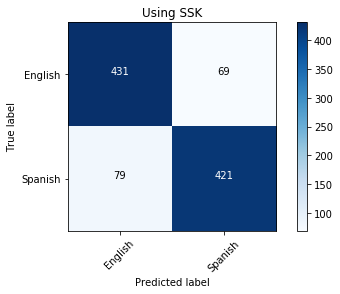

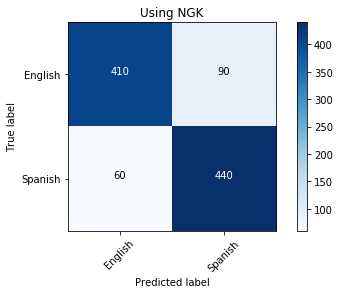

In [31]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Now we will evaluate the performance of the best parameters for both kernels
bestSsk = ssk_3_75
bestSskModel = clf_2_ssk_3_75
bestNgk = ngk_2 = NgkKernel(2) 
bestNgKModel = clf_2_ngk_2

ssk_gram = bestSsk.calc_gram_mat(prod, train)
ngk_gram = bestNgk.calc_gram_mat(prod, train)

pred_ssk = bestSskModel.predict(ssk_gram)
pred_ngk = bestNgKModel.predict(ngk_gram)

#we will create the confusion matrix from these results
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix_ssk = confusion_matrix(true, pred_ssk)
cnf_matrix_ngk = confusion_matrix(true, pred_ngk)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_ssk, classes=("English","Spanish"),
                      title='Using SSK')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_ngk, classes=("English","Spanish"),
                      title='Using NGK')

plt.show()
# Compute confusion matrix


#### ii. 

In [33]:
bad_eng = []
bad_esp = []

for i in range(len(prod)):
    if true[i] != pred_ssk[i]:
        if true[i] == 0:
            bad_eng.append(prod[i])
        else:
            bad_esp.append(prod[i])
            
print "english words classified as spanish: " , bad_eng[:20]
print "spanish words classified as english: " , bad_esp[:20]

english words classified as spanish:  ['club', 'alive', 'mama', 'camera', 'information', 'travel', 'final', 'horrible', 'involve', 'uncomfortable', 'entrance', 'extra', 'create', 'charge', 'record', 'cigarette', 'restaurant', 'mistake', 'exit', 'alarm']
spanish words classified as english:  ['flores', 'zona', 'henry', 'jimmy', 'johnny', 'peter', 'color', 'azul', 'miles', 'juez', 'ingles', 'rojo', 'isla', 'luces', 'esperen', 'come', 'sepa', 'nota', 'nave', 'base']


There are multiple possible explanations for the missclasifications:
    
* There are shared words between english and spanish e.g. extra, come, miles, final, horrible, base, etc.
* There are proper names in the datasets e.g. Henry, Jimmy, Johnny, etc.
* There are some substrings of the words that belong to the other lanaguage e.g. **is**la, **not**a, **crea**te, etc.

#### (iii)

* Finding the gram matrix for SSK is very compute intensive and since we obtained comparable results using NGK is probably not a good kernel for language classification.
* We obtained the best results for SSK with $\lambda = 0.75, n = 3$ and $C = 1$. Further grid exploration of $\lambda$ and $C$ around these values would be worthy.
* For a bag of words with average length equals to 5 we obtained the best results for $n = 3$ for SSK and $n=2$ for NGK it means that when using substrings kernels like the ones used here, it is not a good idea to start with the average as an estimator of the optimal value of n.
* There would be better results if we previously avoid the "undecidable" cases e.g. club, come, miles, etc. And the proper names e.g. Henry, Jimmy, etc. 

### References

##### [1] V. Polianskii, B. Godefroy, W. Kryscinski, F. Franzen (2017). Re-implementation and analysis of the "Text Classification using String Kernels" paper, by Lodhi, Saunders, Shawe-Taylor, Cristianini and Watkins. Report of Project
##### [2]  Lodhi, H., Saunders, C., Shawe-Taylor, J., Cristianini, N., & Watkins, C. (2002). Text classification using string kernels. Journal of Machine Learning Research, 2(Feb), 419-444